In [2]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import timeit

pd.set_option('display.max_rows', 60000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

## Section 6 Tasks
### Subset Columns
#### Task 3
Pick specific columns  with values > 500k

Load the data from the singstats_maritalstatus.xlsx file into a Pandas DataFrame object mydf . Set the index as the first column of the Excel file (i.e. “Variables”)

•	Find out how many rows of the data in the 1980 column have values more than 500000 and how many rows by of the data have values less than or equal to 500000 by creating a derived column using boolean indexing on this column and using the count() method you have learnt in Section 4 of this lab.


In [35]:
mydf = pd.read_excel('lab_datasets/singstats_maritalstatus.xlsx',index_col=0)

data = mydf[['1980']].copy()

more_500 = data[data['1980']>500000]['1980'].count()
less_500 = data[data['1980']<500000]['1980'].count()

print("*** Data in 1980 column ***")
print(data)
print(" ")
print("Number of rows more than 500k is {}".format(more_500))
print("Number of rows less than 500k is {}".format(less_500))

*** Data in 1980 column ***
                        1980
Variables                   
Total                1651500
Single                674100
Married               864600
Widowed                97100
Divorced/ Separated    15800
Males                 833500
Single                375800
Married               435900
Widowed                16000
Divorced/ Separated     5700
Females               818000
Single                298300
Married               428700
Widowed                81100
Divorced/ Separated    10100
 
Number of rows more than 500k is 5
Number of rows less than 500k is 10


### Task 4: Select columns by regular expression

Pick specific columns that start with characters 201 (filter)

Load the data from the singstats_maritalstatus.xlsx file into a Pandas DataFrame object mydf . Set the index as the first column of the Excel file (i.e. “Variables”)

- Select the columns that start with “201” and store them in a dataframe named df_2010_and_after
- Print out the values of df_2010_and_after

Your output should look similar to that below.


In [42]:
mydf = pd.read_excel('lab_datasets/singstats_maritalstatus.xlsx',index_col=0)
re1 = '^201' # Match strings starting with c
df_2010_and_after = mydf.filter(regex=re1)
print(df_2010_and_after)

                        2010     2011     2012     2013     2014     2015  \
Variables                                                                   
Total                3105700  3148700  3183000  3205900  3259800  3275900   
Single               1000500  1012000  1022600  1029300  1048100  1034500   
Married              1844600  1875900  1899000  1911500  1940100  1945600   
Widowed               157600   157700   152300   158000   161100   172100   
Divorced/ Separated   103100   103000   109200   107200   110600   123600   
Males                1517400  1534200  1550000  1560900  1583900  1589600   
Single                527100   529600   534700   535100   538500   533200   
Married               928400   944300   952200   963100   980800   984700   
Widowed                24900    25700    25700    25700    27300    28900   
Divorced/ Separated    37100    34600    37500    37000    37300    42700   
Females              1588300  1614500  1633000  1645000  1675900  1686300   

## B.	Subset rows
### Task 3

Select rows that have > 300mm of rainfall

Load the data from the rainfall-monthly-total.csv file into a Pandas DataFrame object df_rainfall.

Set the index as the first column of the file (i.e. “month”)

Use boolean indexing to select only the rows of data that has more than 300 mm of rainfall and sort the resulting data in ascending order.

Display the twelve year/month with the most rainfall in a barchart using Matplotlib as shown.


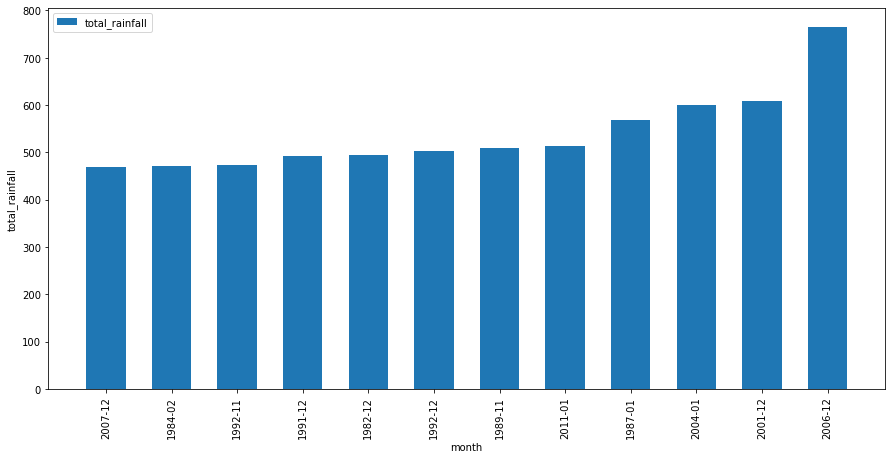

In [88]:
df_rainfall = pd.read_csv('lab_datasets/rainfall-monthly-total.csv',index_col=0)
total_rainfall = df_rainfall[df_rainfall['total_rainfall']>300].sort_values(by='total_rainfall',ascending = True).tail(12)

fig = plt.figure(figsize = (15, 7))
ax = fig.add_subplot(111)
  
# creating the bar plot 
plt.bar(total_rainfall.index, total_rainfall['total_rainfall'], label ='total_rainfall', width = 0.6) 
plt.xticks(rotation = 90)
plt.xlabel("month") 
plt.ylabel("total_rainfall") 
plt.legend(loc='upper left')
plt.show()

# Section 8 Tasks
## B.	Drop missing values with dropna
### Task 1: Drop missing values with dropna
Drop missing values with dropna()

Load the data from the singstats_maritalstatus.xlsx file into a Pandas DataFrame object mydf. Set the index as the first column of the Excel file (i.e. “Variables”) and consider values that have the value “-“ as being missing or invalid.

- Print out the first 10 rows of the dataset which should already reveal the columns or rows with missing or invalid data
- Next, use the pandas dropna method to drop all the columns with missing data from mydf


In [105]:
mydf = pd.read_excel('lab_datasets/singstats_maritalstatus.xlsx',index_col=0,na_values='-' )

print('**** First 10 rows of original dataset ****')
print(mydf.iloc[:10,:7])

print(" ")
mydf = mydf.dropna(axis =1)
print('**** Remaining dataset after dropping columns with missing data ****')

print(mydf.iloc[:8,:6])

**** First 10 rows of original dataset ****
                        1980  1981  1982     1983     1984     1985     1986
Variables                                                                   
Total                1651500   nan   nan  1791900  1829000  1866700  1906600
Single                674100   nan   nan   728000   714300   726600   736500
Married               864600   nan   nan   951200  1005100  1020100  1039700
Widowed                97100   nan   nan   101700    92800    99200   108200
Divorced/ Separated    15800   nan   nan    11000    16700    20800    22300
Males                 833500   nan   nan   901700   912200   929800   948000
Single                375800   nan   nan   404700   393400   400100   408100
Married               435900   nan   nan   476300   499600   506500   517100
Widowed                16000   nan   nan    16600    13600    16200    15500
Divorced/ Separated     5700   nan   nan     4100     5600     7000     7300
 
**** Remaining dataset after d